In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
import timeit

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# set timer
t = timeit.Timer()

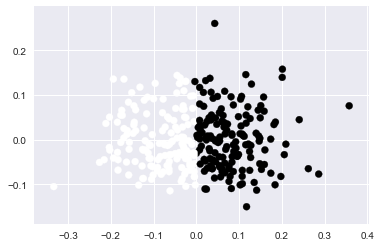

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


0.007342696001299048

In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters = 2, random_state = 42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

t.timeit()

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

t.timeit()

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0       36  154
1      113    0


0.007815679742407655

In [5]:
# Check the solution against the data.
print('Comparing mini batch k-means clusters against the data:')
print(pd.crosstab(predict_mini, y))

Comparing mini batch k-means clusters against the data:
col_0   0    1
row_0         
0      69  121
1      70   43


# Drill: After changing K

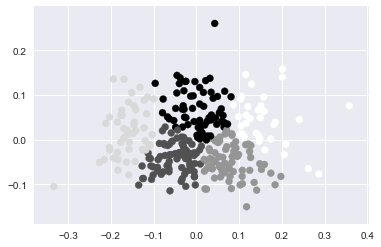

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


0.007403852497760877

In [6]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters = 5, random_state = 42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

t.timeit()

In [7]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=2000)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

t.timeit()

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0      36   0   7   0  12
1       0  44   0   8   0
2       0   0  64   0   1
3       0   4   0   0  43
4       0   0   1  71  12


0.007089032109570681

In [8]:
# Check the solution against the data.
print('Comparing mini batch k-means clusters against the data:')
print(pd.crosstab(predict_mini, y))

Comparing mini batch k-means clusters against the data:
col_0   0   1
row_0        
0      24  31
1      34  18
2      13  52
3      31  16
4      37  47


    Thoughts:
    

After chaning the k-means, the number of clusters increased based on the number that I set. I think increasing the complexity for this dataset does become an issue because the results do not show a clear relationship between the variables. 